# Python A*
Note that this file requires the aStar file

In [1]:
import aStar

## Initial parameter setup

### Map size and traversability
After importing the aStar module, we create our obstacle map. This is generated randomly. We set the umber of rows and columns, and the probability that a node is traversable. Returns True for obstacles and False otherwise.

In [2]:
rows = 15
cols = 15
obsMap = aStar.gen_2d_map(rows, cols, 0.6)

### Problem setup: start and end location
The obsMap matrix designates the location of obstacles. Now, we set up our problem. The problem only needs to take the above map, then start and end-node locations in (x,y) format. 

In [3]:
problem = aStar.mazeSetup(obsMap, (0,rows//2), (cols-1,rows//2))

With the problem set up, A\* is ready to run. In running A\*, each node's parents is set to the node along its shortest path from the start. Thus we can derive the shortest path by following the parent path from the end node to start. However, we return more information so that we can display the entire path explored by the algorithm.

In [4]:
sNode, eNode, visited, toVisit = aStar.AStar(problem, aStar.manhDist)

We now derive the optimal path from the end node as above and print the final output.

## Visualisation 1: Coloured Grid
The below visualisation was added afterward. We start at black and aim towards crimson. Grey cells are obstacles and could not be traversed. Royal blue is the optimal path. Light green cells were visited but not fully explored. Light blue cells were fully explored.

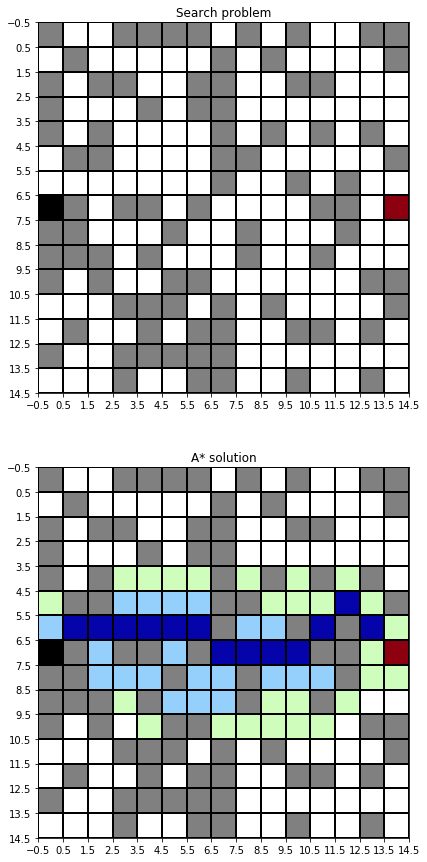

In [5]:
oPath = aStar.optimal_path(sNode, eNode)
aStar.print_grid(oPath, sNode, eNode, visited, toVisit, obsMap)

## Superseded visualisation
Cells below were the first attempt to visualise the solution to the search. It is... Ugly.

In [6]:
aStar.print_visual(oPath, sNode, eNode, visited, toVisit, obsMap)

Pathfinding problem:
|x        x  x  x  x     x     x        x  x|
|   x                 x     x              x|
|x     x  x        x  x        x  x         |
|x           x     x  x                     |
|x     x              x     x     x     x   |
|   x  x              x  x                 x|
|                     x        x     x      |
|S  x     x  x     x              x  x     E|
|x  x           x        x           x      |
|x  x  x     x           x        x         |
|x     x        x  x                    x  x|
|         x  x  x     x     x              x|
|   x        x     x  x        x  x     x   |
|x        x  x  x  x  x                     |
|         x        x  x        x        x   |

A* optimal path solution:
|x        x  x  x  x     x     x        x  x|
|   x                 x     x              x|
|x     x  x        x  x        x  x         |
|x           x     x  x                     |
|x     x  -  -  -  -  x  -  x  -  x  -  x   |
|-  x  x  *  *  *  *  x  x  -  -

| Key | Type        | Description                                                                                                                                                     |
|-----|-------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| -   | Visited     | Node was a neighbour of a visited node but was not fully explored. Likely had a high heuristic and the algorithm found a better solution with no need to return |
| *   | Explored    | Node was fully explored. The optimal path to this node was found. However, it was not on the optimal path from start to end                                     |
| x   | Obstacle    | Node was an obstacle and could not be traversed                                                                                                                 |
| o   | Optimal     | Node was on the optimal path from start to end                                                                                                                  |
| S   | Start       | Starting node                                                                                                                                                   |
| E   | End         | Ending node                                                                                                                                                     |
|     | Not visited | Path was never visited when discovering the optimal path                                                                                                        |